In [ ]:
'''
Plotting recalls (checking Class I) by month and year to find
seasonal trends, etc. with the data. The data are not comprehensive 
before 2012.


USDA 2018 summary
https://www.fsis.usda.gov/wps/portal/fsis/topics/recalls-and-public-health-alerts/recall-summaries/recall-summaries-2018

USDA 2008 summary
https://www.fsis.usda.gov/wps/portal/fsis/topics/recalls-and-public-health-alerts/recall-summaries/recall-summaries-2008


'''

In [2]:
%pylab inline
import pandas as pd
import pylab as pl
import numpy as np
import json
from collections import Counter
import re
import state_abbrev_dict
from importlib import reload
import nltk
import calendar



Populating the interactive namespace from numpy and matplotlib


In [3]:
with open('/Users/laurenbittle/jobs_resumes/TDI_challenge/project/food-enforcement-0001-of-0001.json') as data_file:
    data=json.load(data_file)
df=pd.DataFrame(data['results'])


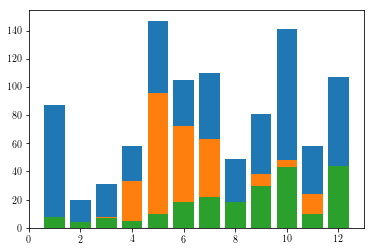

In [6]:
ca_cities_classI=df[(df.classification == 'Class I') & (df.state == 'CA')][['city','reason_for_recall','postal_code','distribution_pattern','recall_initiation_date']]
ca_cities_classI[ca_cities_classI.reason_for_recall.str.contains('listeria monocytogenes',case=False)]['recall_initiation_date'].str[4:6].value_counts()

month_val_ca=ca_cities_classI['recall_initiation_date'].str[4:6]
month_val_lm=ca_cities_classI[ca_cities_classI.reason_for_recall.str.contains('listeria monocytogenes',case=False)]['recall_initiation_date'].str[4:6]
month_val_salm=ca_cities_classI[ca_cities_classI.reason_for_recall.str.contains('salmonella',case=False)]['recall_initiation_date'].str[4:6]



hist_ca=pl.hist(month_val_ca.values.astype('int'),bins=np.arange(1,14),align='left',rwidth=0.8)
hist_lm=pl.hist(month_val_lm.values.astype('int'),bins=np.arange(1,14),align='left',rwidth=0.8)
hist_salm=pl.hist(month_val_salm.values.astype('int'),bins=np.arange(1,14),align='left',rwidth=0.8)



Text(0.5,1,'Class I Recalls, Counts in CA by Month')

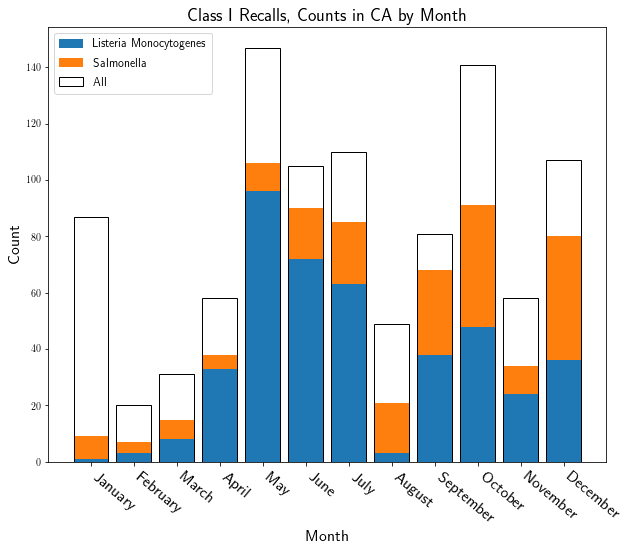

In [7]:

pl.figure(figsize=[10,8])
#pl.bar(hist_lm[1][:-1],hist_lm[0],alpha=0.7)#,bottom=hist_salm[0])
pl.bar(hist_lm[1][:-1],hist_lm[0],label='Listeria Monocytogenes')
pl.bar(hist_salm[1][:-1],hist_salm[0],bottom=hist_lm[0],label='Salmonella')
pl.bar(hist_ca[1][:-1],hist_ca[0],edgecolor='k',color='None',label='All')
pl.legend(fontsize=12)

pl.xticks(np.arange(1,13)\
          ,calendar.month_name[1:13]\
          ,rotation=-40\
          ,fontsize=16\
          ,horizontalalignment='left')
pl.xlabel('Month',fontsize=16)
pl.ylabel('Count',fontsize=16)
pl.title('Class I Recalls, Counts in CA by Month',fontsize=18)


Text(0.5,1,'Class I Recalls from All States by Month')

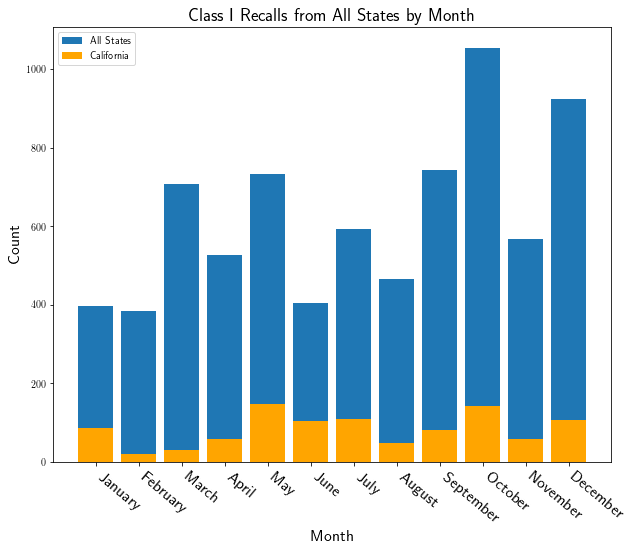

In [10]:
classI=df[df.classification == 'Class I']
months_classI=classI['recall_initiation_date'].str[4:6]
years_classI=classI['recall_initiation_date'].str[:4]
#print(years_classI.value_counts())
#print(df.recall_initiation_date.str[:4].value_counts()) 

ca_cities_classI=df[(df.classification == 'Class I') & (df.state == 'CA')][['city','reason_for_recall','postal_code','distribution_pattern','recall_initiation_date']]
ca_cities_classI[ca_cities_classI.reason_for_recall.str.contains('listeria monocytogenes',case=False)]['recall_initiation_date'].str[4:6].value_counts()

month_val_ca=ca_cities_classI['recall_initiation_date'].str[4:6]
#print(month_val_ca.value_counts())


pl.figure(figsize=[10,8])

classI_hist=pl.hist(months_classI.values.astype('int'),bins=np.arange(1,14),align='left',rwidth=0.8,label='All States')
hist_ca=pl.hist(month_val_ca.values.astype('int'),bins=np.arange(1,14),align='left',rwidth=0.8,color='orange',label='California')

pl.xticks(np.arange(1,13),calendar.month_name[1:13],rotation=-40,fontsize=16,horizontalalignment='left')
pl.xlabel('Month',fontsize=16)
pl.ylabel('Count',fontsize=16)
pl.legend(loc=2)
pl.title('Class I Recalls from All States by Month',fontsize=18)



Text(0.5,1,'Recalls by Year')

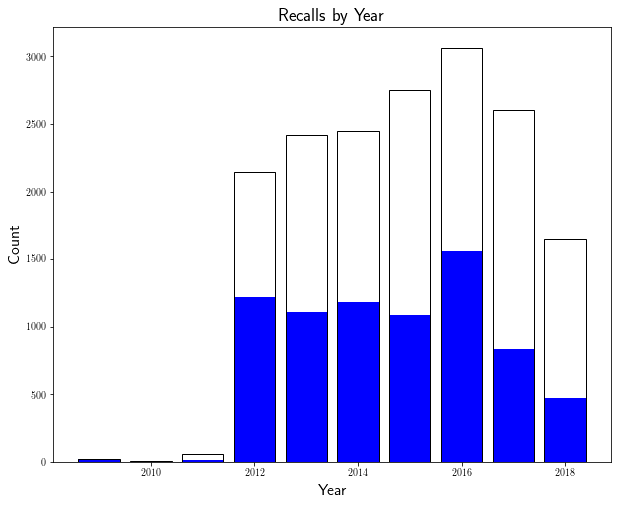

In [26]:
years_classI=classI['recall_initiation_date'].str[:4]
#print(years_classI.value_counts())
#print(df.recall_initiation_date.str[:4].value_counts()) 
years_span=np.arange(years_classI.values.astype('int').min(),years_classI.values.astype('int').max()+1)
#print(len(years_span))
pl.figure(figsize=[10,8])
classI_hist=pl.hist(years_classI.values.astype('int')\
                    ,bins=years_span+1\
                    ,align='left'\
                    ,rwidth=0.8\
                    ,color='blue')

all_hist=pl.hist(df.recall_initiation_date.str[:4].values.astype('int')\
                 ,bins=years_span+1\
                 ,align='left'\
                 ,rwidth=0.8\
                 ,fill=None\
                 ,edgecolor='k')
                 #,edgecolor='k'\
                 #,color='None')

pl.xlabel('Year',fontsize=16)
pl.ylabel('Count',fontsize=16)
pl.title('Recalls by Year',fontsize=18)
